## Pre processing

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import math
import scipy.stats as sts
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('DS1_C8_Computers_Data_Project.csv')
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6259 non-null   int64 
 1   price     6259 non-null   int64 
 2   speed     6259 non-null   int64 
 3   hd        6259 non-null   int64 
 4   ram       6259 non-null   int64 
 5   screen    6259 non-null   int64 
 6   cd        6259 non-null   object
 7   multi     6259 non-null   object
 8   premium   6259 non-null   object
 9   ads_2022  6259 non-null   int64 
 10  ads_2023  6259 non-null   int64 
 11  trend     6259 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 586.9+ KB


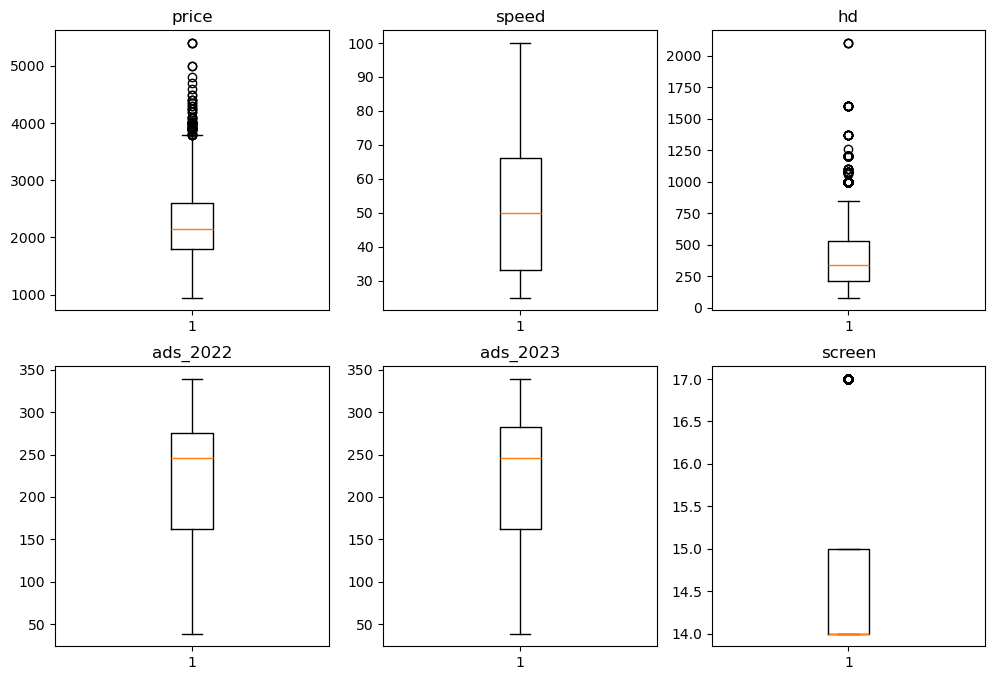

In [21]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
ax[0,0].boxplot(df['price'])
ax[0,0].set_title('price')
ax[0,1].boxplot(df['speed'])
ax[0,1].set_title('speed')
ax[0,2].boxplot(df['hd'])
ax[0,2].set_title('hd')
ax[1,0].boxplot(df['ads_2022'])
ax[1,0].set_title('ads_2022')
ax[1,1].boxplot(df['ads_2023'])
ax[1,1].set_title('ads_2023')
ax[1,2].boxplot(df['screen'])
ax[1,2].set_title('screen')
plt.show()

## Task1

#### Enhance Product Strategy and Sales Performance through Specification - Based Analysis

##### 1a: probability of customer purchasing with altleat 8gb ram, 14 inch screen size & speed above 33 MHz

In [9]:
filter1 = df[(df['ram']>=8) & (df['screen'] == 14) & (df['speed'] > 33)]
filter1

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
5,6,3695,66,340,16,14,no,no,yes,94,104,1
8,9,2225,50,210,8,14,no,no,yes,94,104,1
11,12,2605,66,210,8,14,no,no,yes,94,104,1
14,15,2699,50,212,8,14,no,no,yes,94,104,1
19,20,4395,66,452,8,14,no,no,yes,94,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6238,6239,1744,66,528,8,14,no,no,yes,39,70,35
6240,6241,1595,100,528,8,14,no,no,yes,39,70,35
6246,6247,1554,66,528,8,14,no,no,yes,39,70,35
6247,6248,1654,100,528,8,14,no,no,yes,39,70,35


In [11]:
prob1 = 100*(len(filter1))/len(df)
print(f'probability of customer purchasing with altleat 8gb ram, 14 inch screen size & speed above 33 MHz is {round(prob1,2)}%')

probability of customer purchasing with altleat 8gb ram, 14 inch screen size & speed above 33 MHz is 16.02%


##### 1b: probability of selling premium computers

I. Probability of selling premium computers

In [5]:
filter2 = df[df['premium'] == 'yes']
filter2

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
5,6,3695,66,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [44]:
prob1b = 100*(len(filter2))/len(df)
print(f'probability of selling a premium computer is {round(prob1b,2)}%')
print('-----------')

probability of selling a premium computer is 90.22%
-----------


II. The probability that the computer has CD player given that the computer is premium

In [ ]:
A: prob has cd player
B: prob of computer is premium
To find: prob that computer has cd player given its a premium computer.
p(A/B) = P(A&B) / P(B)
P(B) = filter2
P(A&B) = filter2a

In [30]:
filter2a = df[(df['premium'] == 'yes') & (df['cd'] == 'yes')]
filter2a

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
6,7,1720,25,170,4,14,yes,no,yes,94,104,1
30,31,1920,33,170,4,14,yes,no,yes,94,94,1
63,64,2220,33,250,4,14,yes,no,yes,94,94,1
70,71,4020,66,500,8,14,yes,no,yes,94,94,1
77,78,3220,66,340,8,15,yes,no,yes,94,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6253,6254,2154,66,850,16,15,yes,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [40]:
prob_1b_i = 100*(len(filter2a))/len(filter2)
print(f'The probability that the computer has CD player given that the computer is premium is, {round(prob_1b_i,2)}%')
print('---------')

The probability that the computer has CD player given that the computer is premium is, 50.01%
---------


##### 1C: probability of certain specifications

I. Probability of computer having screen size above 15 inch and being premium

In [34]:
filter3 = df[(df['screen'] > 15) & (df['premium'] == 'yes')]
filter3

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
23,24,2875,50,210,4,17,no,no,yes,94,94,1
32,33,2595,33,210,8,17,no,no,yes,94,94,1
57,58,3075,66,210,4,17,no,no,yes,94,94,1
58,59,2945,66,210,8,17,no,no,yes,94,94,1
71,72,2725,33,210,4,17,no,no,yes,94,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6230,6231,2890,100,1200,24,17,yes,no,yes,39,39,35
6231,6232,2390,66,850,16,17,yes,no,yes,39,39,35
6235,6236,3290,75,1600,32,17,yes,no,yes,39,39,35
6236,6237,2790,66,1200,24,17,yes,no,yes,39,70,35


In [37]:
prob1c_i = 100*(len(filter3))/len(df)
print(f'probability of computer having screen size above 15 inch and being premium is {round(prob1c_i,2)}%')
print('-----------')

probability of computer having screen size above 15 inch and being premium is 8.47%
-----------


II. The probability that the computer has maximum 14 inch screen given that the computer not being premium

In [7]:
filter3a = df[df['premium'] == 'no']
filter3a

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
3,4,1849,25,170,8,14,no,no,no,94,94,1
54,55,2199,33,212,8,14,no,no,no,94,94,1
79,80,1629,25,80,8,14,no,no,no,94,94,1
85,86,1999,33,120,8,14,no,no,no,94,94,1
169,170,1999,33,120,8,14,no,no,no,95,95,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6045,6046,1949,66,420,8,15,no,no,no,52,52,31
6100,6101,1949,66,420,8,15,no,no,no,51,51,32
6166,6167,1949,66,420,8,15,no,no,no,40,40,33
6190,6191,1699,66,630,8,15,no,no,no,39,39,34


In [52]:
filter3b = df[(df['screen'] <= 14) & (df['premium'] == 'no')]
filter3b

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
3,4,1849,25,170,8,14,no,no,no,94,94,1
54,55,2199,33,212,8,14,no,no,no,94,94,1
79,80,1629,25,80,8,14,no,no,no,94,94,1
85,86,1999,33,120,8,14,no,no,no,94,94,1
169,170,1999,33,120,8,14,no,no,no,95,95,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5917,5918,2378,100,364,8,14,yes,no,no,129,129,29
5921,5922,2179,100,364,8,14,no,no,no,129,129,29
5933,5934,1983,66,364,8,14,no,no,no,129,129,29
5962,5963,1891,50,364,8,14,no,no,no,129,129,29


In [54]:
prob_1c_ii = 100*(len(filter3b))/len(filter3a)
print(f'The probability that the computer has maximum 14 inch screen given that the computer not being premium is, {round(prob_1c_ii,2)}%')
print('-------')

The probability that the computer has maximum 14 inch screen given that the computer not being premium is, 69.12%
-------


##### 1D: likelihood of computers having both CD player & multimedia kit

I. Joint probability of computers having both CD player & multimedia kit

In [74]:
filter4 = df[(df['cd'] == 'yes') | (df['multi'] == 'yes')]
filter4
# P(A) * P(B) - P(A or B): since both events can happen simultaneously --> non mutually exclusive

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
6,7,1720,25,170,4,14,yes,no,yes,94,104,1
30,31,1920,33,170,4,14,yes,no,yes,94,94,1
63,64,2220,33,250,4,14,yes,no,yes,94,94,1
70,71,4020,66,500,8,14,yes,no,yes,94,94,1
77,78,3220,66,340,8,15,yes,no,yes,94,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6253,6254,2154,66,850,16,15,yes,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [64]:
probab = len(df[df['cd'] == 'yes']) + len(df[df['multi'] == 'yes']) - len(filter4)
print(f'Joint probability of computers having both CD player & multimedia kit is {round(100*probab/len(df),2)}%')
print('------------')

Joint probability of computers having both CD player & multimedia kit is 13.95%
------------


II. The probability that the computer also has multimedia kit given that the computer has cd player

In [ ]:
The probability that the computer also has multimedia kit given that the computer has cd player:
A: prob that has multimedia kit
B: prob of the computer has cd player
To find: prob that computer has multimedia kit given that the computer has cd player.
p(A/B) = P(A&B) / P(B)
P(B) = len(df[df['cd'] == 'yes'])
P(A&B) = filter4a

In [67]:
filter4a = df[(df['cd'] == 'yes') & (df['multi'] == 'yes')]
filter4a

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
744,745,1945,33,250,4,14,yes,yes,yes,249,249,7
760,761,1939,50,170,4,14,yes,yes,yes,249,249,7
780,781,2045,33,250,4,15,yes,yes,yes,249,249,7
792,793,1829,33,170,4,14,yes,yes,yes,249,249,7
802,803,2599,50,230,4,14,yes,yes,yes,249,249,7
...,...,...,...,...,...,...,...,...,...,...,...,...
6226,6227,3123,75,1600,32,15,yes,yes,yes,39,39,35
6228,6229,2323,100,850,16,15,yes,yes,yes,39,39,35
6242,6243,2723,100,1200,24,15,yes,yes,yes,39,70,35
6248,6249,2623,66,1200,24,15,yes,yes,yes,39,70,35


In [71]:
prob_1d_ii = 100*(len(filter4a))/len(df[df['cd'] == 'yes'])
print(f'The probability that the computer also has multimedia kit given that the computer has cd player is, {round(prob_1d_ii,2)}%')

The probability that the computer also has multimedia kit given that the computer has cd player is, 30.02%


# Task 2

#### Assessing Price Disparities between Premium & Non premium computers as compared to prices of both categories together

##### Task 2a: Average price of computers in the popuation

In [9]:
mean_p = st.mean(df['price'])
print('Average price of computers in the popuation is',mean_p)

Average price of computers in the popuation is 2219.576609682058


In [11]:
Avg_price = []
Avg_price.append(mean_p)
sample = ['Population','SrS with replacement','Srs without replacemect','stratified','clustered','systematic']

##### 2b) Average price of samples that are from different methods

i) Simple Random sampling with replacement

In [13]:
Srs_with = df.sample(n=200,replace = True,random_state = 1)
Avg_price.append(st.mean(Srs_with['price']))

ii) Simple Random sampling without replacement

In [16]:
Srs_without = df.sample(n=200,random_state = 1)
Avg_price.append(st.mean(Srs_without['price']))

iii) Stratified sampling

In [21]:
strat_sample = []
grouped = df.groupby(['premium'])
speed = df.premium.unique()
for s in speed:
    s_data = grouped.get_group(s)
    samp_data = s_data.sample(n=25,random_state = 1)
    strat_sample.append(samp_data)

strat_sample = pd.concat(strat_sample,ignore_index = True)
Avg_price.append(st.mean(strat_sample['price']))

iv) Clustered sampling

In [24]:
clust_sample = []
group_data = df.groupby(['premium'])
spd = ['yes']
for s in spd:
    sp_data = group_data.get_group(s)
    clust_data = sp_data.sample(n=200, random_state = 1)
    clust_sample.append(clust_data)

clust_sample = pd.concat(clust_sample,ignore_index = True)
Avg_price.append(st.mean(clust_sample['price']))

v) Systematic sampling

In [27]:
syst_sample = df[::30]
Avg_price.append(st.mean(syst_sample['price']))

In [29]:
price_comparison = pd.DataFrame(sample,Avg_price)
price_comparison

,0
2219.576610,Population
2202.775000,SrS with replacement
2266.720000,Srs without replacemect
2179.280000,stratified
2268.945000,clustered
2242.157895,systematic


##### 2c) Average price of the population for premium & non - premium computers

In [108]:
prem_avg = st.mean(filter2['price'])
print('The average price of the population for the premium computers is', prem_avg)
non_prem_avg = st.mean(filter3a['price'])
print('The average price of the population for the Non-premium computers is', non_prem_avg)

The average price of the population for the premium computers is 2204.148397379139
The average price of the population for the Non-premium computers is 2361.9346405228757


In [133]:
# Sample from SrS without replacement method & its average price for premium & non-premium computers
Srs_prem = Srs_without[Srs_without['premium']=='yes']
print('The average price for the simple random sampling without replacement sample of the premium computers is',st.mean(Srs_prem['price']))
Srs_non_prem = Srs_without[Srs_without['premium']=='no']
print('The average price for the simple random sampling without replacement sample of the Non-premium computers is',st.mean(Srs_non_prem['price']))

The average price for the simple random sampling without replacement sample of the premium computers is 2256.3812154696134
The average price for the simple random sampling without replacement sample of the Non-premium computers is 2365.2105263157896


## Task 3

#### Understanding computer price trends through distribution analysis

##### a) Distribution of sample mean for computer prices of different sample sizes

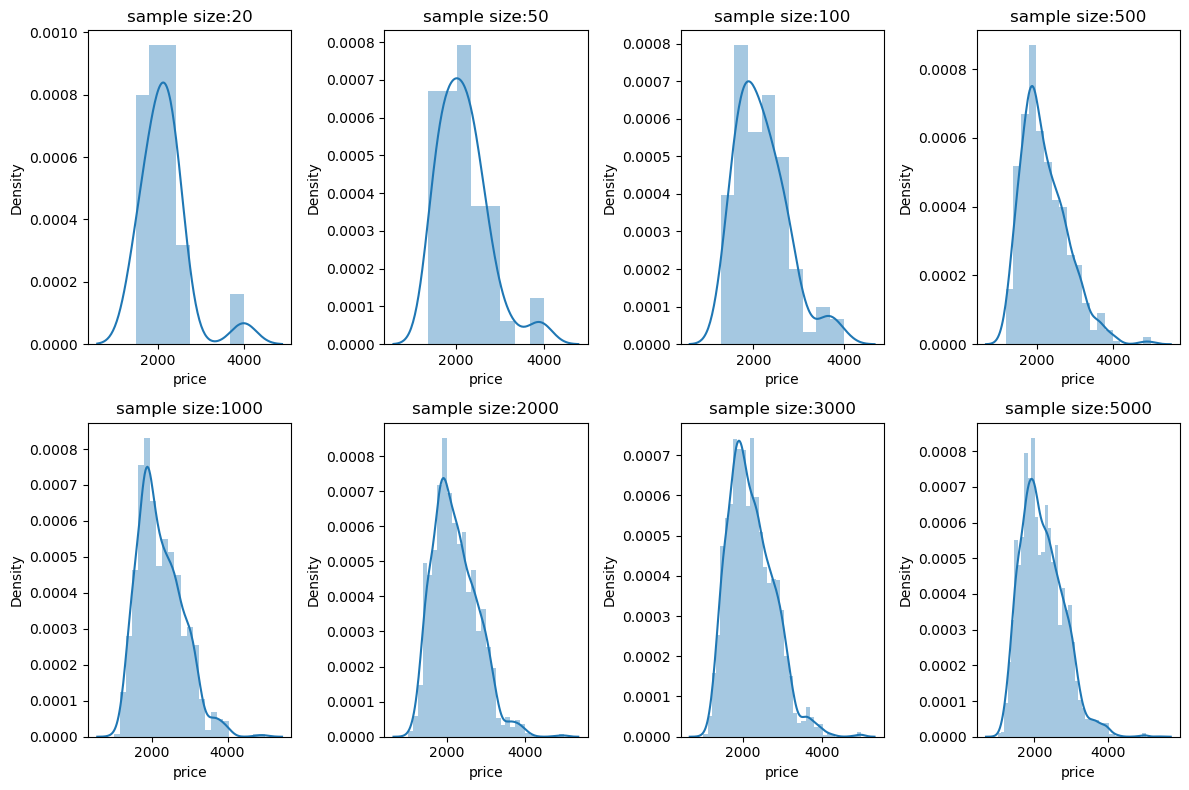

In [151]:
num = [20,50,100,500,1000,2000,3000,5000]
list_price = []
mean_price = []
fig,ax = plt.subplots(2,4,figsize=(12,8))
for i in num:
    samp = df.sample(n=i,replace=True,random_state = 1)
    list_price.append(samp['price'])
    mean_price.append(st.mean(samp['price']))

k = 0
for i in range(0,2):
    for j in range(0,4):
        sns.distplot(list_price[k],ax=ax[i,j])
        ax[i,j].set_title(label = 'sample size:'+str(len(list_price[k])))
        k=k+1

plt.tight_layout()
plt.show()

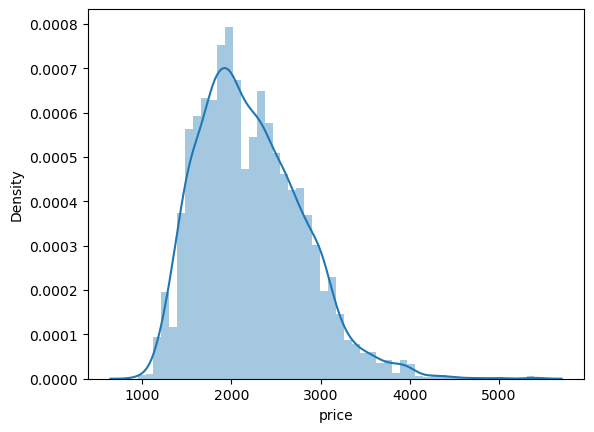

In [153]:
sns.distplot(df['price'])
plt.show()

In [193]:
samples = pd.DataFrame()
samples['size'] = num
samples['mean_prize'] = mean_price
print('The sample size & its mean:')
samples

The sample size & its mean:


,size,mean_prize
0,20,2145.350000
1,50,2172.200000
2,100,2181.610000
3,500,2212.250000
4,1000,2227.662000
5,2000,2213.780500
6,3000,2217.038667
7,5000,2221.275200


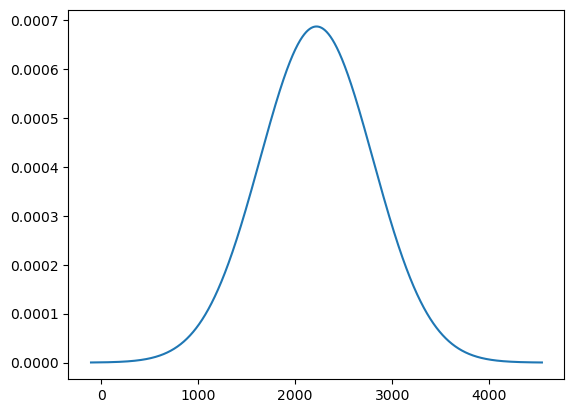

In [41]:
# Normal distribution curve for population
lower_p=mean_p-4*std_p
upper_p=mean_p+4*std_p
Arr=np.arange(lower_p,upper_p)
plt.plot(Arr,norm.pdf(Arr,mean_p,std_p))

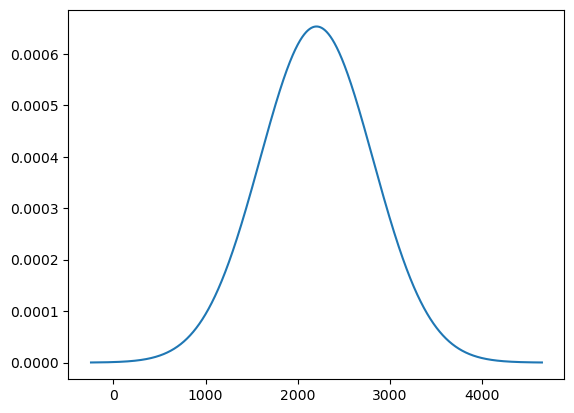

In [35]:
# Normal distribution curve for sample
lower_s=mean_s-4*std_s
upper_s=mean_s+4*std_s
Arr1=np.arange(lower_s,upper_s)
plt.plot(Arr1,norm.pdf(Arr1,mean_s,std_s))

##### c) Central limit theorem properties:

In [31]:
# population statistics
list_p=df['price'].tolist()
mean_p=st.mean(list_p)
median_p=st.median(list_p)
mode_p=st.mode(list_p)
std_p=st.stdev(list_p)
skew_p=sts.skew(list_p, bias = False)
kurt_p=sts.kurtosis(list_p, bias = False)
print('Mean of poluation:',mean_p)
print('Median of population:',median_p)
print('Mode of population:',mode_p)
print('Standard deviation:',std_p)
print('skewness of population:',skew_p)
print('Kurtosis of population:',kurt_p)

Mean of poluation: 2219.576609682058
Median of population: 2144
Mode of population: 1999
Standard deviation: 580.8039556527063
skewness of population: 0.7117247480608602
Kurtosis of population: 0.7304170367653207


In [33]:
# Sample from SRs with replacement of size 200 statistics
list_s=Srs_with['price'].tolist()
mean_s=st.mean(list_s)
median_s=st.median(list_s)
mode_s=st.mode(list_s)
std_s=st.stdev(list_s)
skew_s=sts.skew(list_s, bias=False)
kurt_s=sts.kurtosis(list_s, bias=False)
print('Mean of sample:',mean_s)
print('Median of sample:',median_s)
print('Mode of sample:',mode_s)
print('Standard deviation:',std_s)
print('skewness of sample:',skew_s)
print('Kurtosis of sample:',kurt_s)

Mean of sample: 2202.775
Median of sample: 2099.0
Mode of sample: 1490
Standard deviation: 610.9592378601318
skewness of sample: 0.9044547395027426
Kurtosis of sample: 1.1945910468190561


In [171]:
sample_df=pd.DataFrame()
for i in range(0,20):
    sample_df['sample_'+str(i)] = df['price'].sample(n=200,replace=True).reset_index(drop=True)

sample_df

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,sample_11,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19
0,1495,1648,2295,1640,2390,2690,3397,2675,2168,2344,2955,2390,1999,1399,2690,2259,1799,2099,1745,3595
1,3175,1944,2093,2695,2929,1349,2144,2290,1890,2299,2799,1995,1499,2399,1395,1590,2044,1825,1845,2094
2,1840,3190,1594,3044,1813,2298,1790,2244,2690,2799,2768,2845,1944,1558,1775,2644,2390,2140,3365,1568
3,1990,1894,1399,2690,2594,1799,1395,2490,2490,2690,2755,1704,3035,1799,2593,2182,3090,1990,2199,2590
4,2845,1595,2099,1490,1895,1695,1199,1640,2170,1789,2044,3108,1999,1690,2095,1769,1748,1844,3048,2890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3144,2088,1290,2099,2744,2190,3595,1990,1829,1804,2685,3609,2044,2999,2645,2044,1999,1944,3095,2744
196,1599,2599,2454,3319,1949,1944,1579,1690,3334,2990,1894,1395,1825,2599,1784,1295,3399,1549,1893,2295
197,1494,2595,1895,2495,3104,1695,2944,3334,2344,1699,2090,1945,2395,1695,1799,1995,3194,1379,1994,1995
198,1994,1890,3699,1479,2840,1890,2644,3044,2623,2844,1898,1490,2244,2590,1845,1929,1995,2298,3085,1499


In [173]:
mean = []
for i in sample_df.columns:
    mean.append(st.mean(sample_df[i]))

mean

[2214.235,
 2280.115,
 2241.525,
 2136.88,
 2272.805,
 2205.195,
 2268.395,
 2271.295,
 2271.27,
 2282.675,
 2170.45,
 2314.495,
 2259.03,
 2254.92,
 2230.295,
 2266.7,
 2279.14,
 2179.78,
 2164.18,
 2265.94]

In [175]:
# standard deviation of sample mean
std_samp = st.stdev(mean)
std_samp

47.62616421011059

In [179]:
# standard deviation of sample from population std deviation
std_pplt = std_p/math.sqrt(200)
std_pplt

41.06904155819995

# Project 2

## Task 1

##### Analyzing Advertising Budget for Premium computers by Identifying Budget Allocation

In [9]:
# set alpha
alpha1 = 0.05
# set decision rule
# if p_value1 < alpha1; -z_critical1 > z_statistics1 > z_critical1; Then reject Null hypothesis

In [11]:
# sample from premium computers (filter2 = data set on filter premium = yes)
samp1 = filter2.sample(n=40,replace=True,random_state=1)
t1a_s_mean = st.mean(samp1['ads_2022'])
print('sample mean for ad budget in 2022:',t1a_s_mean)

sample mean for ad budget in 2022: 216.45


In [13]:
# statiscal measures
t1a_s_mean = 216.45
t1a_p_mean = 221.3
t1a_p_std = 74.83
t1a_s_size = 40

In [15]:
z_statistics1 = (t1a_s_mean - t1a_p_mean)/(t1a_p_std/math.sqrt(t1a_s_size)) 
print('Z statistics:',z_statistics1)
p_value1 = norm.sf(abs(z_statistics1))
print('P value:',p_value1)
z_critical1 = norm.ppf(1-alpha1)
print('Z critical value:',z_critical1)

Z statistics: -0.4099170560421412
P value: 0.34093339661233246
Z critical value: 1.6448536269514722


##### Mean advertising budget spent on premium computers in 2022 is less than or equal to 221.3. 

## Task2

##### Evaluate the Price Difference between Computers with and without CD players

In [45]:
#sampl1 with CD player
filter_cd = df[df['cd'] == 'yes']
filter_cd

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
6,7,1720,25,170,4,14,yes,no,yes,94,104,1
30,31,1920,33,170,4,14,yes,no,yes,94,94,1
63,64,2220,33,250,4,14,yes,no,yes,94,94,1
70,71,4020,66,500,8,14,yes,no,yes,94,94,1
77,78,3220,66,340,8,15,yes,no,yes,94,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6253,6254,2154,66,850,16,15,yes,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [47]:
# sample 2 without CD player
filter_no_cd = df[df['cd'] == 'no']
filter_no_cd

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6240,6241,1595,100,528,8,14,no,no,yes,39,70,35
6246,6247,1554,66,528,8,14,no,no,yes,39,70,35
6247,6248,1654,100,528,8,14,no,no,yes,39,70,35
6252,6253,1690,66,1200,8,14,no,no,yes,39,70,35


In [49]:
# set alpha
alpha2 = 0.05
# set decision rule
# if p_value2 < alpha2; -z_critical2 > z_statistics2 > z_critical2; Then reject Null hypothesis

In [51]:
mean_2a = st.mean(filter_cd['price'])
mean_2b = st.mean(filter_no_cd['price'])
std_2a = st.stdev(filter_cd['price'])
std_2b = st.stdev(filter_no_cd['price'])
var_2a = std_2a**2
var_2b = std_2b**2
n_2a = len(filter_cd)
n_2b = len(filter_no_cd)

In [53]:
print('Price of computers with CD player:')
print('Mean',mean_2a)
print('Standard deviation:',std_2a)
print('Variance:',var_2a)
print('size:',n_2a)
print('---------')
print('Price of computers without CD player:')
print('Mean',mean_2b)
print('Standard deviation:',std_2b)
print('Variance:',var_2b)
print('size:',n_2b)

Price of computers with CD player:
Mean 2342.6055708390645
Standard deviation: 527.4477919505294
Variance: 278201.173233489
size: 2908
---------
Price of computers without CD player:
Mean 2112.8119964189796
Standard deviation: 603.494237086272
Variance: 364205.29419634154
size: 3351


In [55]:
z_statistics2 = (mean_2a-mean_2b)/(math.sqrt(var_2a/n_2a + var_2b/n_2b))
print('Z statistics:',z_statistics2)
p_value2 = norm.sf(abs(z_statistics2)) *2
print('P value:',p_value2)
z_critical2 = norm.ppf(1-alpha2/2)
print('Z critical value:',z_critical2)

Z statistics: 16.07486310306849
P value: 3.8283817362952e-58
Z critical value: 1.959963984540054


In [57]:
# upper & lower bound in confidence interval (1.96 is z_critical value for 95% confidence level)
lhs1 = (mean_2a-mean_2b) - 1.96*(math.sqrt(var_2a/n_2a + var_2b/n_2b))
rhs1 = (mean_2a-mean_2b) + 1.96*(math.sqrt(var_2a/n_2a + var_2b/n_2b))
print('Lower bound of confidence interval:',lhs1)
print('Upper bound of confidence interval:',rhs1)

Lower bound of confidence interval: 201.7749590841079
Upper bound of confidence interval: 257.812189756062


##### There is significant difference in the average price of computers with & without CD players

## Task 3a

##### Analyze Premium computer pricing strategy

In [76]:
# set alpha
alpha3 = 0.05
# set decision rule
# if p_value3 < alpha3; -t_critical3 > t_statistics3 > t_critical3; Then reject Null hypothesis

In [78]:
# sample from premium computers (filter2 = data set on filter premium = yes)
samp3 = filter2.sample(n=25,replace=True,random_state=1)
t3_s_mean = st.mean(samp3['price'])
t3_s_std = st.stdev(samp3['price'])
print('sample mean price for premium computers in 2022:',t3_s_mean)
print('standard deviation of price for premium computers in 2022:',t3_s_std)

sample mean price for premium computers in 2022: 2113.08
standard deviation of price for premium computers in 2022: 495.66184037103363


In [80]:
# statiscal measures
t3_s_mean = 2113.08
t3_p_mean = 2200
t3_s_std = 495.6618
t3_s_size = 25
df = 24 # n-1 = 25-1 

In [82]:
t_statistics3 = (t3_s_mean - t3_p_mean)/(t3_s_std/math.sqrt(t3_s_size)) 
print('t statistics:',t_statistics3)
p_value3 = t.sf(abs(t_statistics3),df) *2
print('P value:',p_value3)
t_critical3 = t.ppf(1-alpha3/2,df)
print('t critical value:',t_critical3)

t statistics: -0.8768075328782656
P value: 0.38928361459779015
t critical value: 2.0638985616280205


##### Mean price of premium computers is $2200

## Task 3b

##### Analyze price disparity between Premium & Non-premium computers

In [18]:
# set alpha
alpha4 = 0.05
# set decision rule
# if p_value4 < alpha4; -z_critical4 > z_statistics4 > z_critical4; Then reject Null hypothesis

In [20]:
# sample from premium computers (filter2 = data set on filter premium = yes)
samp4a = filter2.sample(n=25,replace=True,random_state=1)
mean_4a = st.mean(samp4a['price'])
std_4a = st.stdev(samp4a['price'])
var_4a = std_4a**2
n_4a = 25
# sample from non-premium computers (filter3a = data set on filter premium = no)
samp4b = filter3a.sample(n=25,replace=True,random_state=1)
mean_4b = st.mean(samp4b['price'])
std_4b = st.stdev(samp4b['price'])
var_4b = std_4b**2
n_4b = 25
df = 48 # 25 + 25 -2

In [22]:
print('Price of sample of premium computers:')
print('Mean',mean_4a)
print('Standard deviation:',std_4a)
print('Variance:',var_4a)
print('size:',n_4a)
print('---------')
print('Price of sample of non-premium computers:')
print('Mean',mean_4b)
print('Standard deviation:',std_4b)
print('Variance:',var_4b)
print('size:',n_4b)
print('------')
print('Degrees of freedom:',df)

Price of sample of premium computers:
Mean 2113.08
Standard deviation: 495.66184037103363
Variance: 245680.66000000003
size: 25
---------
Price of sample of non-premium computers:
Mean 2272.96
Standard deviation: 528.077131361193
Variance: 278865.45666666667
size: 25
------
Degrees of freedom: 48


In [24]:
t_statistics4 = abs(mean_4a-mean_4b)/((math.sqrt(var_4a*(n_4a-1) + var_4b*(n_4b-1)))*(math.sqrt(1/n_4a + 1/n_4b)))
print('t statistics:',t_statistics4)
p_value4 = t.sf(abs(t_statistics4),df) *2
print('P value:',p_value4)
t_critical4 = t.ppf(1-alpha4/2,df)
print('t critical value:',t_critical4)

t statistics: 0.15931317288778774
P value: 0.8740906140995186
t critical value: 2.010634757624232


##### There is no significant differences in the mean price of premium and non-premium computers

## summary

##### Enhance Product Strategy and Sales Performance through Specification 

##### Assessing Price Disparities between Premium & Non premium computers as compared to prices of both categories together

##### Understanding computer price trends through distribution analysis